# Import libraries

In [64]:
import pandas as pd
import lxml
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import data into a dataframe

In [47]:
df = pd.read_html("http://en.wikipedia.org/wiki/List_of_aircraft_accidents_and_incidents_resulting_in_at_least_50_fatalities", match = "Date")[0]

# General data cleaning

## Dataframe backup

In [48]:
dfbak = df

## Keep commercial flights only

In [49]:
df = df[df.loc[:,("T", "T")] == "COM"]

## Extract year from date

In [50]:
df.loc[:,("Date", "Year")] = pd.DatetimeIndex(df.loc[:,("Date", "Date")]).year

## Keep completed years only (Remove 2020 crashes)

In [51]:
df = df[df.loc[:,("Date", "Year")] != 2020]

# Global Plot

## Group/Count per year

In [52]:
year_count = pd.crosstab(index = df.loc[:,("Date", "Year")], columns="count")

## Plot

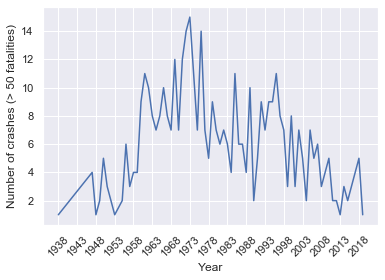

In [65]:
plt.plot(year_count.index, year_count.loc[:,"count"], )
plt.xticks(range(1938,2019, 5))
plt.tick_params(axis ='x', rotation = 45) 
plt.xlabel('Year') 
plt.ylabel('Number of crashes (> 50 fatalities)') 

plt.show()

# Plots per phase

## Per-phase cleaning & EDA

### Extract phases from ('Phase', 'Phase') column

In [54]:
phase_new = []
for phase in df.loc[:,("Phase", "Phase")].str.split("["):
    phase_new.append(phase[0])

### Add phases to dataframe

In [55]:
df.loc[:,("Phase", "Phase New")] = phase_new

### Phases frequency table

In [56]:
phase_count = pd.crosstab(index = df.loc[:,("Phase", "Phase New")], columns="count")

In [57]:
phase_count

col_0,count
"(Phase, Phase New)",
APR,162
APR/ENR,2
ENR,189
ENR/LDG,1
ICL,43
LDG,21
TOF,19
TOF/TXI,2
TXI/TOF,1


## ENR Plot

### Create dataframe with ENR entries only

In [58]:
dfENR = df[df.loc[:,("Phase", "Phase New")] == "ENR"]

### Group/Count by year

In [59]:
year_count_ENR = pd.crosstab(index = dfENR.loc[:,("Date", "Year")], columns="count")

### ENR Plot

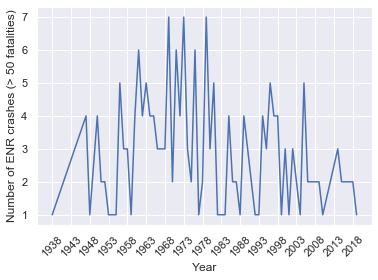

In [66]:
plt.plot(year_count_ENR.index, year_count_ENR.loc[:,"count"], )
plt.xticks(range(1938,2019, 5))
plt.tick_params(axis ='x', rotation = 45) 
plt.xlabel('Year') 
plt.ylabel('Number of ENR crashes (> 50 fatalities)') 

plt.show()

## APR Plot

### Create dataframe with APR entries only

In [61]:
dfAPR = df[df.loc[:,("Phase", "Phase New")] == "APR"]

### Group/Count by year

In [62]:
year_count_APR = pd.crosstab(index = dfAPR.loc[:,("Date", "Year")], columns="count")

### APR Plot

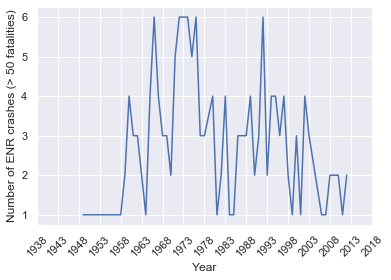

In [67]:
plt.plot(year_count_APR.index, year_count_APR.loc[:,"count"], )
plt.xticks(range(1938,2019, 5))
plt.tick_params(axis ='x', rotation = 45) 
plt.xlabel('Year') 
plt.ylabel('Number of ENR crashes (> 50 fatalities)') 

plt.show()